# Decision Tree

In [1]:
# 데이터 불러오기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
# NULL값이 없습니다.
wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# 특성과 타깃 나누고 넘파이 배열로 변환
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 결정 트리 모델 만들기
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [10]:
# 분류할 수 있는 최대로 트리를 만들어 과적합이 된 모델이 만들어짐.

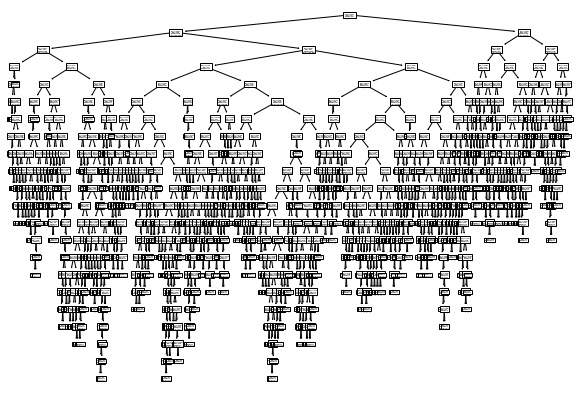

In [11]:
# 트리 모델 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

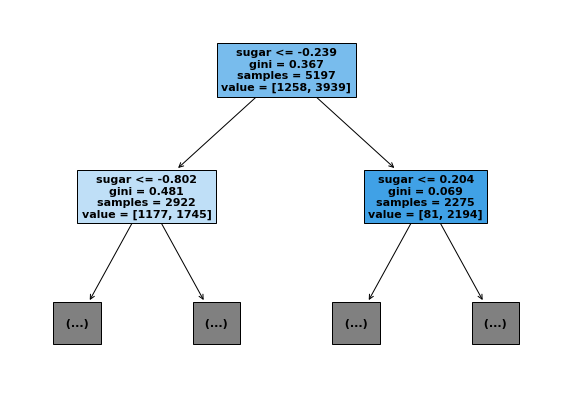

In [12]:
# 맨 위의 트리 모양을 보겠습니다.
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol',
                                                      'sugar','pH'])
plt.show()

##### 맨 위의 특성 기준으로 분류합니다.
##### gini는 지니 불순도를 나타냅니다.
##### 샘플 개수와 양성과 음성으로 분류되는 샘플도 확인할 수 있습니다.

In [13]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


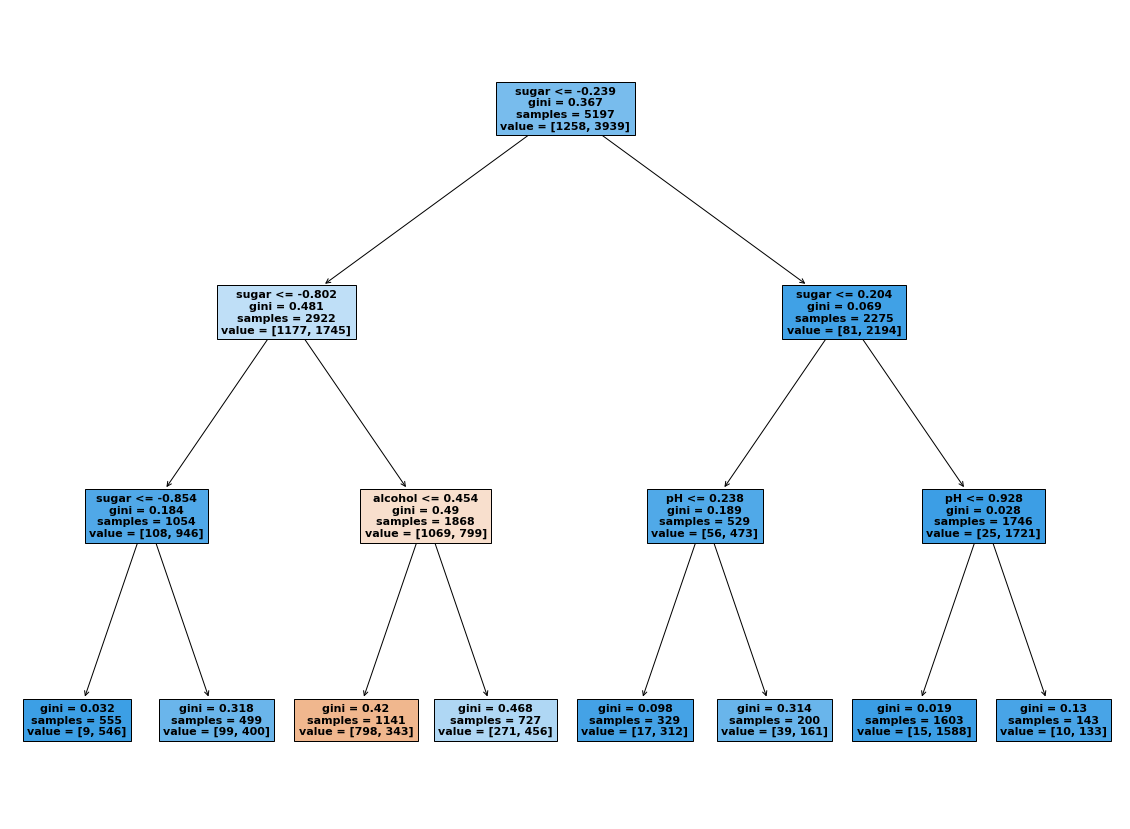

In [14]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

##### 결정트리 모델을 사용하면 로지스틱회귀 모델을 사용해 분류할 때 보다 어떤 기준으로 분류하는지 직관적으로 확인할 수 있습니다.
##### feature값이 스케일링 되어 있기 때문에 하기 전의 값으로 다시 트리를 만들어 보겠습니다.

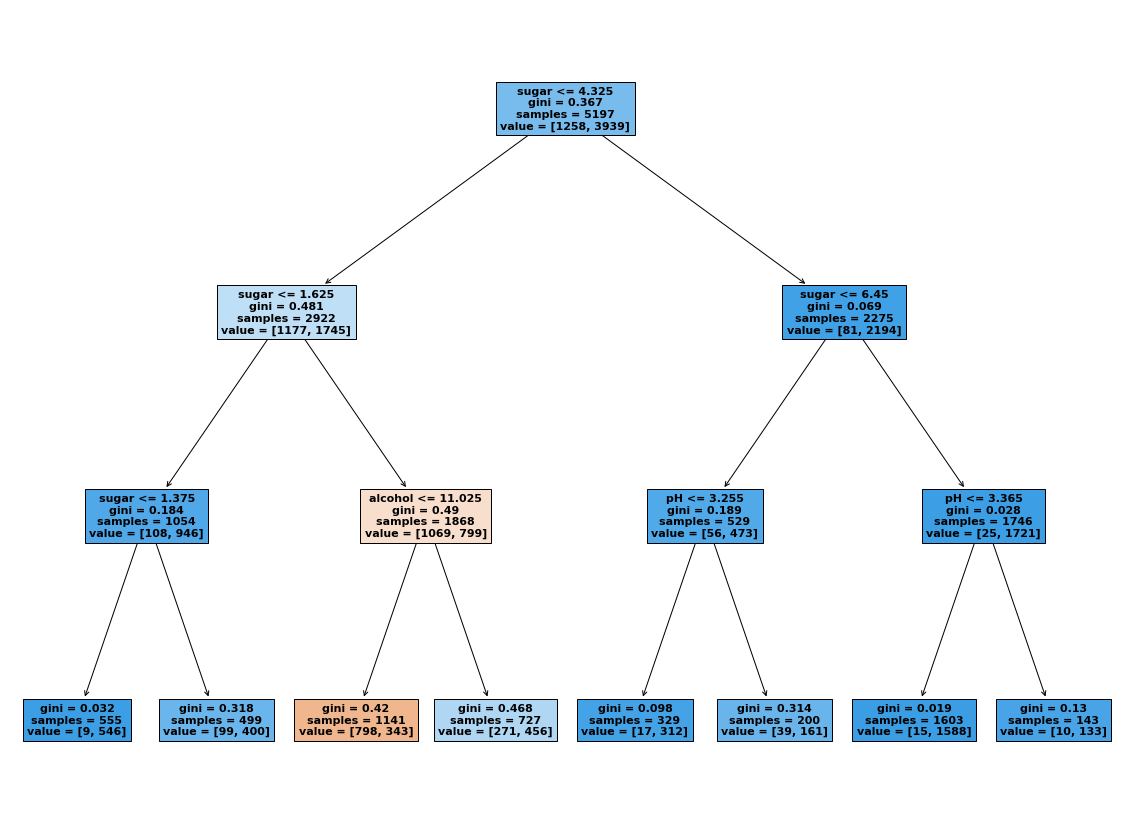

In [15]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

##### 스케일링 되기 전 값으로 정확한 분류 기준을 확인할 수 있습니다.
##### 분류가 잘 된 노드일수록 색이 진하게 표출됩니다.

In [16]:
# 어떤 feature가 분류에 가장 유용한지 확인해 봅니다.
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

##### 2번제 feature 당도(sugar)가 분류에 가장 유용했던 것을 알 수 있습니다.